# Принятие решений в бизнесе на основе данных - "Проверка гипотез по увеличению выручки в интернет-магазине — оценика результатов A/B теста"

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

<b>Описание данных:</b>

Данные для первой части.

В файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

1. Hypothesis — краткое описание гипотезы;
2. Reach — охват пользователей по 10-балльной шкале;
3. Impact — влияние на пользователей по 10-балльной шкале;
4. Confidence — уверенность в гипотезе по 10-балльной шкале;
5.Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части.

Файле с данными о заказах пользователей.

1. transactionId — идентификатор заказа;
2. visitorId — идентификатор пользователя, совершившего заказ;
3. date — дата, когда был совершён заказ;
4. revenue — выручка заказа;
5. group — группа A/B-теста, в которую попал заказ.

Файл о пользователях интернет-магазина

1. date — дата;
2. group — группа A/B-теста;
3. visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<b>Задача:</b> В данной работе нам предстоит приоритезировать список гипотез для увеличения выручки, применив фреймворки ICE и RICE, и проанализировать результаты проведенного А/В теста с помощью средств визуализации и статистических расчетов.

### Приоритизация гипотез.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth = 150

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
pd.options.display.max_colwidth = 50
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

Применим фреймворки:

In [41]:
hypothesis['ICE'] = np.round(hypothesis['impact'] * hypothesis['confidence'] 
                             / hypothesis['efforts'], 2)

display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


In [39]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] *
               hypothesis['confidence'] / hypothesis['efforts'])

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


После использования фреймоврка ICE выделяем топ-3 гипотезы - c акцией на день рождения, два новых канала, добавление формы подписки; после RICE - добавление формы подписки, добавление блока рекомендаций, два новых канала привлечения (плюс гипотеза с баннерами имеет такой же приоритет, что и последняя). Первые две гипотезы "вырвались вперед" из-за высокого параметра Reach - 10 и 8 соответственно. Фреймворк RICE показывает, как много пользователей затронет изменение.

###  Анализ A/B-теста.

In [6]:
orders = pd.read_csv('orders.csv')
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Можно подготовить данные и проверить на дубликаты идентификаторы заказа:

In [8]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Поищем пользователей, которые находятся сразу в двух группах:

In [9]:
dup = list(orders.groupby('visitorId')
             .nunique()
             .query('group == 2')
             .index)
np.round(len(dup) / orders['visitorId'].nunique() * 100, 2)

5.63

Процент пользователей, находящихся в обоих группах, составляет 5,63%, что не критическим значением, поэтому их учитывать не будем.

In [10]:
orders = orders.query('visitorId not in @dup')

In [11]:
visitors = pd.read_csv('visitors.csv')
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [14]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                     orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
5,2019-08-03,B,54,53,288850,1803
6,2019-08-04,A,77,71,388030,2562
7,2019-08-04,B,68,66,385740,2573
8,2019-08-05,A,99,92,474413,3318
9,2019-08-05,B,89,87,475648,3280


1. Построим график кумулятивной выручки по группам

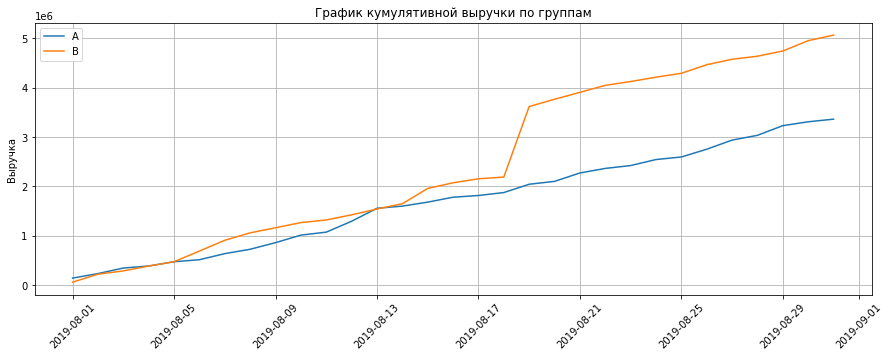

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')


plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

<b>Вывод:</b> До 05.08.2019 выручка росла примерно одинаково, от 05.08.2019 до 13.08.2019 выручка группа В росла быстрее, но к концу периода значения сравнялись. После 13.08.2013 выручка группы В начала расти быстрее и больше значения не сравнивались (особенно заметен скачок 19.08.2019, его можно рассмотреть отдельно).

In [16]:
orders.query('date == "2019-08-19"').sort_values(by='revenue', ascending=False).head(6)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B


Так и есть, видим крупный заказ на 1294500. Дальше по ходу исследования, мы будем "очищать" данные, и можно будет построить новые графики по новым данным.

2. Построим график кумулятивного среднего чека по группам.

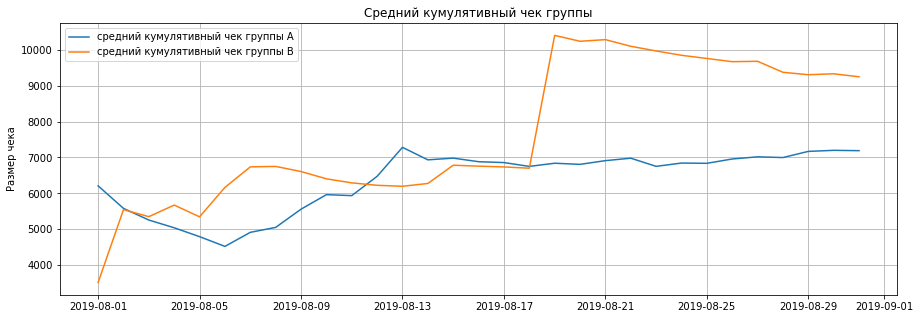

In [17]:
plt.figure(figsize=(15,5))
plt.grid()

plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], 
         label='средний кумулятивный чек группы A')

plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], 
         label='средний кумулятивный чек группы B')

plt.title('Средний кумулятивный чек группы')
plt.ylabel('Размер чека')

plt.legend() ;

<b>Вывод:</b> Видим сходство с графиком выручки. До скачка 19.08.2019 сначала лидирует группа В, затем А, после скачка чек группы В постепенно снижается, а чек группы А остается примерно на том же уровне. Из-за плавного снижения в группе В еще рано говорить, что значения остаются на том же уровне. 

3. Построим график относительного изменения кумулятивного среднего чека.

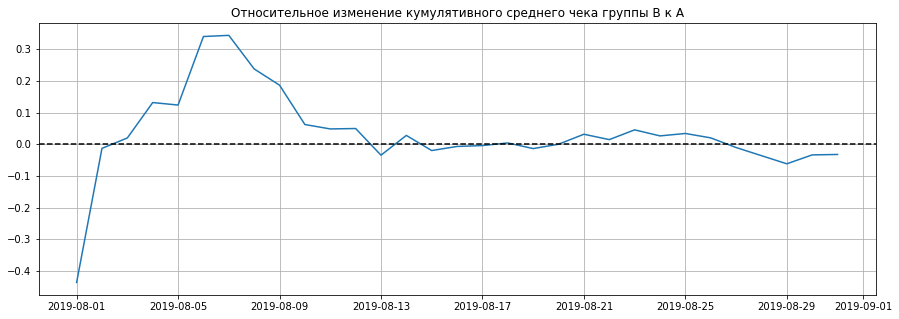

In [44]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()

plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ 
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Относительное изменение кумулятивного среднего чека группы B к А')

plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

<b>Вывод:</b> Так как график зависит от значений из предыдущего пункта, выводы можно сделать аналогичные. Сначала "перевес" на стороне группы В, но после 06.08.2019 идет обратный процесс в пользу А до 13.08.2019, потом изменение движется к 0 до скачка. После скачка, отношение опять спадает в сторону А.

4. Построим график кумулятивного среднего количества заказов на посетителя.

In [19]:
cumulativeData['visitors']

0       719
1       713
2      1338
3      1294
4      1845
      ...  
57    17708
58    18037
59    18198
60    18736
61    18916
Name: visitors, Length: 62, dtype: int64

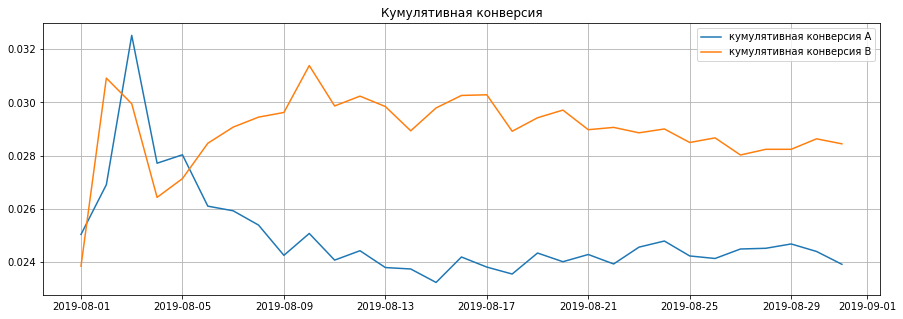

In [45]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], 
         label='кумулятивная конверсия A')

plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], 
         label='кумулятивная конверсия B')

plt.title('Кумулятивная конверсия')
plt.legend()
plt.show()

<b>Вывод:</b> В начале теста группа А имела больщую конверсию, после 13.08.2019 снизалась и зафиксировалась на одном уровне ниже 0.026. У группы В на графике видна обратная ситуация и после пересечения 06.08.2019 значения выше группы А.

5. Построим график относительного изменения кумулятивного среднего количества заказов

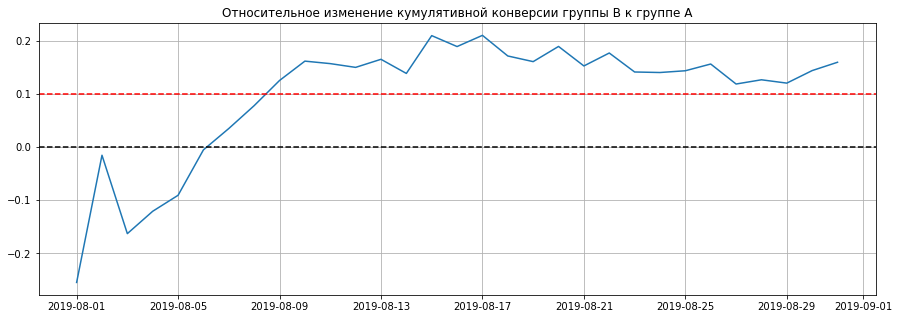

In [43]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], 
                                left_on='date', right_on='date', how='left', suffixes=['A', 'B']))
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='red', linestyle='--')
plt.show()

<b>Вывод:</b> Конверсия группы В показывает себя лучше группы А. После 03.08.2019 виден сильный рост, который прекращается только 10.08.2019, и после этого времени изменение не падает ниже 0.1

6. Построим точечный график количества заказов по пользователям.

In [49]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
                      .groupby('visitorId', as_index=False)
                      .agg({'transactionId' : pd.Series.nunique}))

ordersByUsers.columns = ['user_id','orders']

print('Таблица количества заказов \n каждого пользователя \n')
print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

Таблица количества заказов 
 каждого пользователя 

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


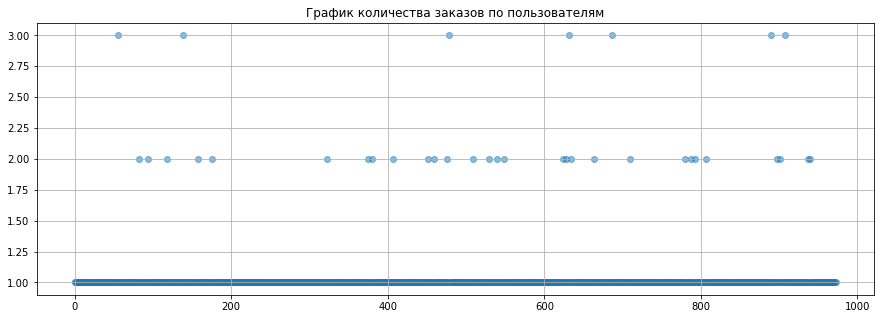

In [51]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) 
plt.show()

<b>Вывод:</b> По графику видно, что большая часть людей совершает покупку один раз. Иногда число доходит до 2-ух, очень редко - до 3-х. Следующим шагом посчитаем перцентили.

7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [23]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


<b>Вывод:</b> Видно, что большинство (99%) пользователей делают 1 или 2 заказа. Всё что выше - можно убрать.

8. Построим точечный график стоимостей заказов. 

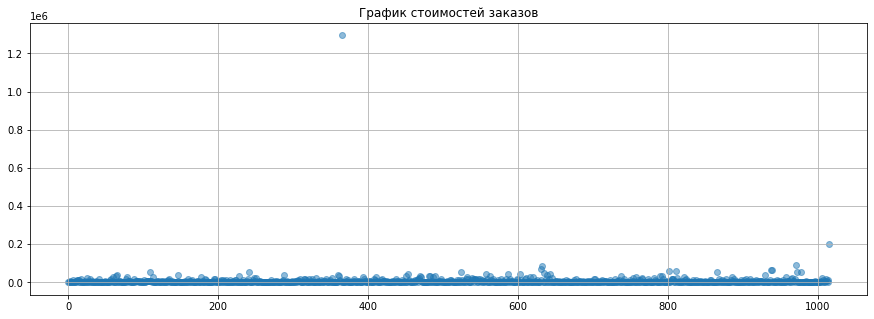

In [55]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.show()

Построим более наглядный график, убрав аномально большие значения:

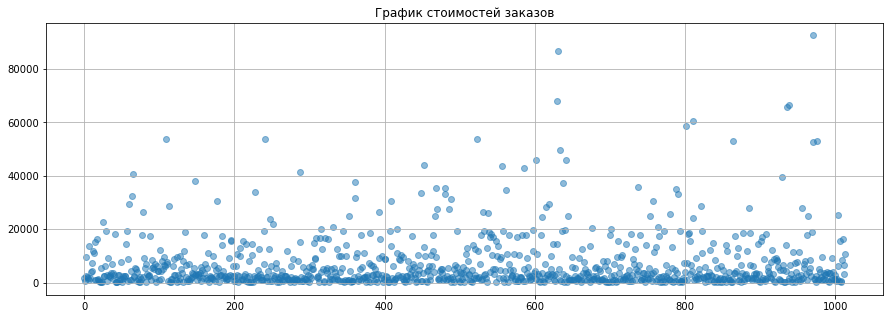

In [52]:
new_orders = orders[orders['revenue']<=200000]['revenue']
xn_values = pd.Series(range(0,len(new_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(xn_values, new_orders, alpha=0.5)
plt.show()

<b>Вывод:</b> Видно два аномальных значения, большинство же заказов не превышает 20000.

9. Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов.

In [26]:
print('Рассчитаем 95 и 99 перцентили по выручке заказов : ', np.percentile(orders['revenue'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по выручке заказов :  [26785. 53904.]


<b>Вывод: </b>Не более 5% пользователей совершили заказ на сумму больше 26785. 99% заказов меньше суммы 53904, установим её в качестве границы для аномалий.

10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [27]:
#создадим вспомогательные таблицы
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Установим нулевую гипотезу Н0 как: "статистически значимых различий в конверсии между группами нет"; альтернативная гипотеза Н1 звучит : "существует статистически значимые различия между группами".

In [28]:
ordersByUsersA = (orders[orders['group']=='A']
                        .groupby('visitorId', as_index=False)
                        .agg({'transactionId' : pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group']=='B']
                       .groupby('visitorId', as_index=False)
                       .agg({'transactionId' : pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA']
                     .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB']
                     .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)

print("p-value = ",
    stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1])

print("Относительный показатель 'B' и 'A' = {0:.3f}"
      .format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value =  0.011018084110014696
Относительный показатель 'B' и 'A' = 0.160


<b>Вывод:</b> p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: по «сырым» данным различия в конверсии групп A и B есть.

11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов (пороговое значение возьмём равное 5%). И найдём относительные различия в среднем чеке между группами.

Установим нулевую гипотезу Н0 как: "статистически значимых различий в средних чеках между группами нет"; альтернативная гипотеза Н1 звучит : "статистически значимые различия есть".

In [29]:
print("alpha =",0.05)
print("p-value = ", stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                    orders[orders['group']=='B']['revenue'], 
                                                    alternative = 'two-sided')[1])
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue']
                                                            .mean()/orders[orders['group']=='A']['revenue']
                                                            .mean()-1)) 

alpha = 0.05
p-value =  0.8294908998149533
Относительный показатель 'B' и 'A' = 0.287


<b>Вывод:</b> Видим, что p-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть средние чеки по "сырым" данным схожи. Удивительно, ведь средний чек группы B значительно выше среднего чека группы A.

12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

In [56]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >
                                                np.percentile(ordersByUsers['orders'],  99)]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] >
                                                np.percentile(ordersByUsers['orders'],  99)]['userId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'],  99)]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
                  .drop_duplicates()
                  .sort_values())

Очистим данные заказа, и еще раз построим графики:

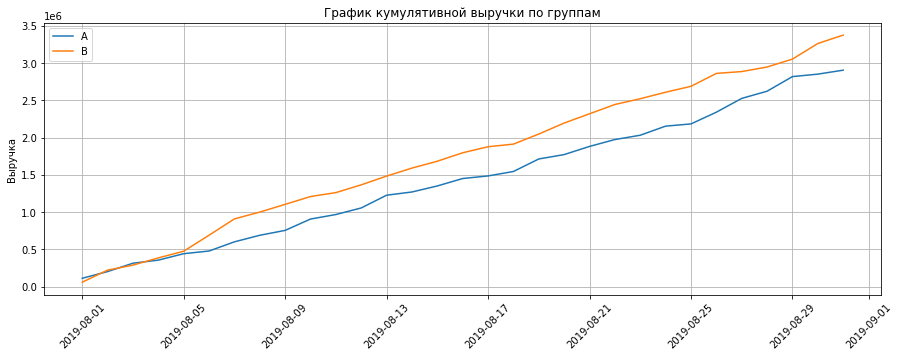

In [57]:
new_orders = orders.query('visitorId not in @abnormalUsers.tolist()')
datesGroups = new_orders[['date','group']]

ordersAggregated = datesGroups.apply(lambda x: 
                                     new_orders[np.logical_and(new_orders['date'] 
                                     <= x['date'], orders['group'] == x['group'])]. 
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
                                          

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date']
                                       <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
                                            

cumulativeData = ordersAggregated.merge(visitorsAggregated, 
                                        left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')

plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

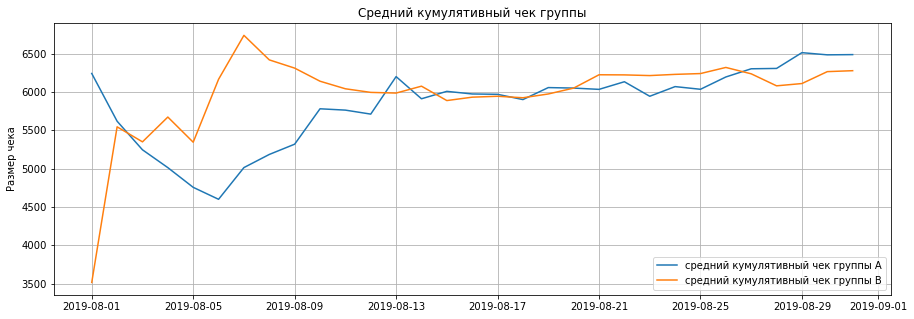

In [53]:
plt.figure(figsize=(15,5))
plt.grid()

plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], 
         label='средний кумулятивный чек группы A')

plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], 
         label='средний кумулятивный чек группы B')

plt.title('Средний кумулятивный чек группы')
plt.ylabel('Размер чека')

plt.legend()
plt.show()

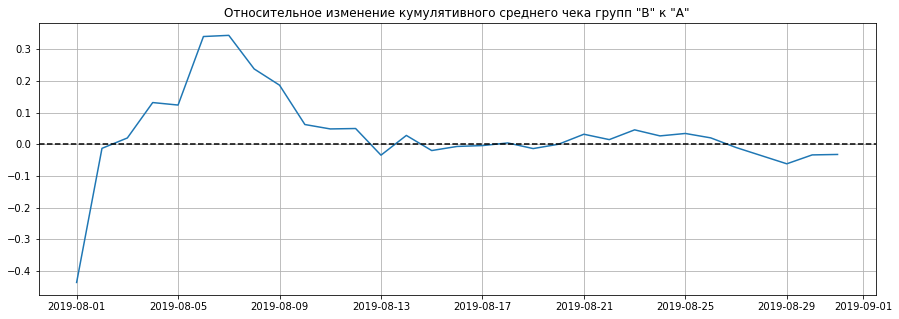

In [54]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()

plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ 
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')

plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Без аномальных значений графики стали почти равными. Посмотрим, что покажут статистические тесты.

In [34]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']
                                                         .isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA']
                                       .sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']
                                                           .isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB']
                                       .sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

Установим нулевую гипотезу Н0 как: "статистически значимых различий в конверсии между группами нет"; альтернативная гипотеза Н1 звучит : "существует статистически значимые различия между группами".

In [35]:
print("alpha =",0.05)
print("p-value = ", stats.mannwhitneyu(sampleAFiltered, 
                                                    sampleBFiltered, 
                                                    alternative = 'two-sided')[1])
print("Относительный показатель 'B' и 'A' = {0:.3f}"
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value =  0.007021302207652193
Относительный показатель 'B' и 'A' = 0.189


<b>Вывод:</b> p-value = 0.007 что меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит, что и по «очищенным» данным различия в конверсии групп A и B есть. 

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Установим нулевую гипотезу Н0 как: "статистически значимых различий в средних чеках между группами нет"; альтернативная гипотеза Н1 звучит : "статистически значимые различия есть".

In [36]:

print("alpha =",0.05)
print("p-value = ", format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
                                          alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId']
                                                              .isin(abnormalUsers)))]['revenue']
                                                              .mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value =  0.7877044862440841
Относительный показатель 'B' и 'A' = -0.032


<b>Вывод:</b> P-value значительно больше 0.05, и причин отвергать нулевую гипотезу нет, то есть можно считать, что в среднем чеке различия нет, что повторяет выводы по "сырым" данным.

### 14. Принятие решения и выводы.

Тест можно остановить и считать успешно пройденным.

Конверсия в группе A не равна группе B (между выборками имеется статистическая значимость) по сырым и по очищенным данным.
Средний чек в группе A равен группе B (статистическая значимость не значительна и сделать вывод о различии нельзя) по сырым и по очищенным данным.

После анализа видно, что группа В показывает лучше результат в конверсии.
Среднемий чек не имеет значимых различий между группами.

Графики после обработки данных колеблются в нешироком диапазоне и сильных колебаний не показывают.